In [136]:
import json
import pickle

from scipy.sparse import coo_matrix, csr_matrix, csc_matrix, lil_matrix
from scipy.linalg import norm

from sklearn.decomposition import TruncatedSVD

from matplotlib import pyplot as plt
from IPython.display import HTML, display
import pandas as pd
import numpy as np
import random


In [2]:
with open("stored_variables/politics_tokens_text_tfidf.pickle", 'rb') as f:
    comment_tfidf = pickle.load(f)

In [3]:
with open("stored_variables/auth_sample_r_politics_authors.json", 'r') as f:
    comment_auths = json.load(f)

In [116]:
with open("stored_variables/user_subreddit_tf.pickle", "rb") as f:
    subreddit_tf = pickle.load(f)

In [117]:
with open("stored_variables/user_subreddit_tf_auths.pickle", "rb") as f:
    author_names = pickle.load(f)

In [7]:
with open("stored_variables/user_subreddit_tf_subreddit_names.pickle", "rb") as f:
    subreddit_reverse_dict = pickle.load(f)

## Consolidate all comments by each user

In [8]:
author_reverse_dict = {author_names[i]:i for i in range(len(author_names))}

In [9]:
author_index_mapping = [author_reverse_dict[auth] for auth in comment_auths]

In [10]:
author_index_mapping[:5]

[12049, 496, 13502, 1594, 2957]

In [11]:
author_index_lists = [[] for i in comment_auths]

In [12]:
for i in range(len(author_index_mapping)):
    author_index_lists[author_index_mapping[i]].append(i)

In [13]:
author_index_lists[0]

[28117, 42390, 62493, 69447, 191770, 327109, 507092]

In [14]:
comment_tfidf[author_index_lists[0]]

<7x26903 sparse matrix of type '<class 'numpy.float64'>'
	with 67 stored elements in Compressed Sparse Row format>

In [15]:
comment_tfidf[author_index_lists[0]].sum(axis=0)

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [16]:
user_tfidf = lil_matrix((len(author_names), comment_tfidf.shape[1]))

In [17]:
for i in range(len(author_names)):
    user_tfidf[i] = comment_tfidf[author_index_lists[i]].sum(axis=0)

In [18]:
user_tfidf = csr_matrix(user_tfidf)

In [19]:
user_tfidf_norms = np.zeros(user_tfidf.shape[0])

In [20]:
for i in range(20):
    user_tfidf_norms[i*1000 : (i+1) * 1000] = norm(user_tfidf[i*1000 : (i+1) * 1000].toarray(), axis=1)

In [21]:
np.sum(user_tfidf_norms == 0)

128

In [22]:
nonzero_indices = [i for i in range(user_tfidf.shape[0]) if user_tfidf_norms[i] > 0]

In [23]:
user_tfidf_norms[nonzero_indices].shape

(19872,)

In [24]:
user_tfidf_normalized = csr_matrix(user_tfidf[nonzero_indices, :] / user_tfidf_norms[nonzero_indices, np.newaxis])

## Cosine similarities

In [62]:
subreddit_cosine_sims = np.zeros((user_tfidf_normalized.shape[0], user_tfidf_normalized.shape[0]))

In [63]:
for i in range(5):
    max_index1 = min((i+1)*1000, user_tfidf_normalized.shape[0])
    chunk1 = user_tfidf_normalized[i*1000 : max_index1, :]
    for j in range(20):
        max_index2 = min((j+1)*1000, user_tfidf_normalized.shape[0])
        chunk2 = user_tfidf_normalized[j*1000 : max_index2, :]
        subreddit_cosine_sims[i*1000 : max_index1, j*1000 : max_index2] = chunk1.dot(csc_matrix(chunk2.T)).toarray()


In [64]:
for i in range(5,10):
    max_index1 = min((i+1)*1000, user_tfidf_normalized.shape[0])
    chunk1 = user_tfidf_normalized[i*1000 : max_index1, :]
    for j in range(20):
        max_index2 = min((j+1)*1000, user_tfidf_normalized.shape[0])
        chunk2 = user_tfidf_normalized[j*1000 : max_index2, :]
        subreddit_cosine_sims[i*1000 : max_index1, j*1000 : max_index2] = chunk1.dot(csc_matrix(chunk2.T)).toarray()


In [65]:
for i in range(10,15):
    max_index1 = min((i+1)*1000, user_tfidf_normalized.shape[0])
    chunk1 = user_tfidf_normalized[i*1000 : max_index1, :]
    for j in range(20):
        max_index2 = min((j+1)*1000, user_tfidf_normalized.shape[0])
        chunk2 = user_tfidf_normalized[j*1000 : max_index2, :]
        subreddit_cosine_sims[i*1000 : max_index1, j*1000 : max_index2] = chunk1.dot(csc_matrix(chunk2.T)).toarray()


In [66]:
for i in range(15,20):
    max_index1 = min((i+1)*1000, user_tfidf_normalized.shape[0])
    chunk1 = user_tfidf_normalized[i*1000 : max_index1, :]
    for j in range(20):
        max_index2 = min((j+1)*1000, user_tfidf_normalized.shape[0])
        chunk2 = user_tfidf_normalized[j*1000 : max_index2, :]
        subreddit_cosine_sims[i*1000 : max_index1, j*1000 : max_index2] = chunk1.dot(csc_matrix(chunk2.T)).toarray()


In [68]:
for i in range(user_tfidf_normalized.shape[0]):
    subreddit_cosine_sims[i,i] = 0

In [69]:
subreddit_cosine_sims[:10, :10]

array([[0.        , 0.1719182 , 0.22505432, 0.05709984, 0.        ,
        0.08161339, 0.0414649 , 0.11388844, 0.03649721, 0.14950288],
       [0.1719182 , 0.        , 0.54653004, 0.1990964 , 0.07487276,
        0.07993296, 0.13998132, 0.29244882, 0.0680828 , 0.30938603],
       [0.22505432, 0.54653004, 0.        , 0.20796884, 0.0568248 ,
        0.11735653, 0.13723308, 0.3243069 , 0.09350922, 0.42718907],
       [0.05709984, 0.1990964 , 0.20796884, 0.        , 0.01655341,
        0.05228141, 0.0476902 , 0.1448155 , 0.01328451, 0.1169083 ],
       [0.        , 0.07487276, 0.0568248 , 0.01655341, 0.        ,
        0.        , 0.00411344, 0.0529361 , 0.        , 0.02530465],
       [0.08161339, 0.07993296, 0.11735653, 0.05228141, 0.        ,
        0.        , 0.02773797, 0.07462108, 0.04699023, 0.06517395],
       [0.0414649 , 0.13998132, 0.13723308, 0.0476902 , 0.00411344,
        0.02773797, 0.        , 0.06054228, 0.01079588, 0.08521319],
       [0.11388844, 0.29244882, 0.3243069

In [70]:
# with open("stored_variables/user_comment_tfidf_cossims.pickle", "wb") as f:
#     pickle.dump(subreddit_cosine_sims, f)
with open("stored_variables/user_comment_tfidf_cossims.pickle", "rb") as f:
    subreddit_cosine_sims = pickle.load(f)

In [74]:
most_similar_user = np.zeros(user_tfidf_normalized.shape[0], dtype = np.int32)

In [75]:
for i in range(user_tfidf_normalized.shape[0]):
    most_similar_user[i] = np.argsort(subreddit_cosine_sims[i])[-1]

In [76]:
most_similar_user[:10]

array([ 5433,  3543,  5240,  5460,  5739, 14699, 16025,  3699, 19098,
         489], dtype=int32)

In [77]:
[subreddit_cosine_sims[i, most_similar_user[i]] for i in range(10)]

[0.2862979588803271,
 0.7095173675870902,
 0.7791600670814074,
 0.31025967045087277,
 0.3095227782325683,
 0.2570771661331643,
 0.27932893763601224,
 0.48270475031570137,
 0.38267922248858255,
 0.5665090393956965]

## Check similarities by subreddits authors commented in

In [81]:
author_names = [author_names[i] for i in nonzero_indices]
subreddit_tf = subreddit_tf[nonzero_indices, :]


In [114]:
author_reverse_dict = {author_names[i]:i for i in range(len(author_names))}

In [118]:
num_sanders = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['sandersforpresident']]) for k in author_names}
num_trump = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['the_donald']]) for k in author_names}
num_clinton = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['hillaryclinton']]) for k in author_names}
num_politics = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['politics']]) for k in author_names}


In [119]:
comment_threshold = 10

In [120]:
sanders_user_indices = [i for i in range(subreddit_tf.shape[0]) if num_sanders[author_names[i]] >= comment_threshold]
trump_user_indices = [i for i in range(subreddit_tf.shape[0]) if num_trump[author_names[i]] >= comment_threshold]
clinton_user_indices = [i for i in range(subreddit_tf.shape[0]) if num_clinton[author_names[i]] >= comment_threshold]

In [44]:
none_user_indices = [i for i in range(subreddit_tf.shape[0]) if num_sanders[author_names[i]] == 0 and 
                     num_trump[author_names[i]] == 0 and
                     num_clinton[author_names[i]] == 0]

In [45]:
print(len(sanders_user_indices))
print(len(trump_user_indices))
print(len(clinton_user_indices))
print(len(none_user_indices))

1555
915
137
12856


In [46]:
print(len(set(sanders_user_indices).intersection(trump_user_indices)))
print(len(set(sanders_user_indices).intersection(clinton_user_indices)))
print(len(set(trump_user_indices).intersection(clinton_user_indices)))

206
73
18


In [83]:
np.sum(subreddit_cosine_sims[sanders_user_indices, :][:,sanders_user_indices]) / \
(len(sanders_user_indices) * (len(sanders_user_indices)-1))

0.3269398708397079

In [84]:
np.sum(subreddit_cosine_sims[trump_user_indices, :][:,trump_user_indices]) / \
(len(trump_user_indices) * (len(trump_user_indices)-1))

0.222626107617488

In [85]:
np.sum(subreddit_cosine_sims[clinton_user_indices, :][:,clinton_user_indices]) / \
(len(clinton_user_indices) * (len(clinton_user_indices)-1))

0.4355421733362365

In [86]:
np.sum(subreddit_cosine_sims[none_user_indices, :][:,none_user_indices]) / \
(len(none_user_indices) * (len(none_user_indices)-1))

0.0777579223886308

In [87]:
np.sum(subreddit_cosine_sims) / (subreddit_cosine_sims.shape[0] * (subreddit_cosine_sims.shape[1] - 1))

0.10325964914936943

In [88]:
print(np.sum(subreddit_cosine_sims[sanders_user_indices, :][:,trump_user_indices]) / \
((len(sanders_user_indices) * len(trump_user_indices)) - \
len(set(sanders_user_indices).intersection(trump_user_indices))))

print(np.sum(subreddit_cosine_sims[sanders_user_indices, :][:,clinton_user_indices]) / \
((len(sanders_user_indices) * len(clinton_user_indices)) - \
len(set(sanders_user_indices).intersection(clinton_user_indices))))

print(np.sum(subreddit_cosine_sims[clinton_user_indices, :][:,trump_user_indices]) / \
((len(clinton_user_indices) * len(trump_user_indices)) - \
len(set(clinton_user_indices).intersection(trump_user_indices))))

print()
print(np.sum(subreddit_cosine_sims[sanders_user_indices, :][:,none_user_indices]) / \
((len(sanders_user_indices) * len(none_user_indices))))
print(np.sum(subreddit_cosine_sims[trump_user_indices, :][:,none_user_indices]) / \
((len(trump_user_indices) * len(none_user_indices))))
print(np.sum(subreddit_cosine_sims[clinton_user_indices, :][:,none_user_indices]) / \
((len(clinton_user_indices) * len(none_user_indices))))

0.2675780924449106
0.3765296839104821
0.30705193925044294

0.158404383345169
0.1298725512779201
0.18143419106387051


In [89]:
print(len(set(most_similar_user[sanders_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user[sanders_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user[sanders_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user[sanders_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user[sanders_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user[sanders_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))
print()
print(len(set(most_similar_user[trump_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user[trump_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user[trump_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user[trump_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user[trump_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user[trump_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))
print()
print(len(set(most_similar_user[clinton_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user[clinton_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user[clinton_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user[clinton_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user[clinton_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user[clinton_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))



133
0.08553054662379421
49
0.053551912568306013
20
0.145985401459854

99
0.06366559485530547
59
0.06448087431693988
13
0.0948905109489051

37
0.023794212218649517
12
0.013114754098360656
11
0.08029197080291971


In [90]:
sanders_sanders_sims = []

for i in range(len(sanders_user_indices)):
    for j in range(i+1, len(sanders_user_indices)):
        sanders_sanders_sims.append(subreddit_cosine_sims[sanders_user_indices[i],sanders_user_indices[j]])

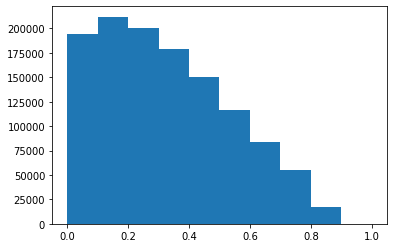

In [91]:
plt.hist(sanders_sanders_sims, range = (0, 1))
plt.show()

In [92]:
trump_trump_sims = []

for i in range(len(trump_user_indices)):
    for j in range(i+1, len(trump_user_indices)):
        trump_trump_sims.append(subreddit_cosine_sims[trump_user_indices[i],trump_user_indices[j]])

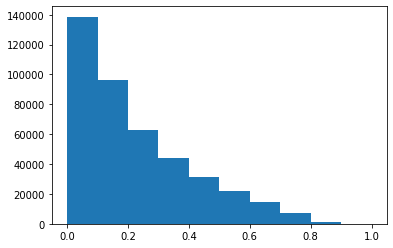

In [93]:
plt.hist(trump_trump_sims, range = (0,1))
plt.show()

In [98]:
clinton_clinton_sims = []

for i in range(len(clinton_user_indices)):
    for j in range(i+1, len(clinton_user_indices)):
        clinton_clinton_sims.append(subreddit_cosine_sims[clinton_user_indices[i],clinton_user_indices[j]])

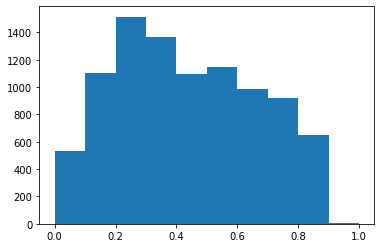

In [99]:
plt.hist(clinton_clinton_sims, range = (0,1))
plt.show()

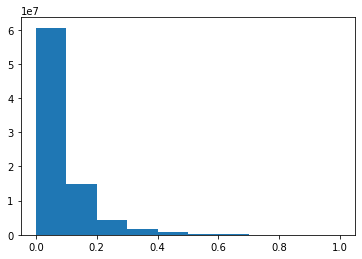

In [97]:
none_none_sims = []

for i in range(len(none_user_indices)):
    for j in range(i+1, len(none_user_indices)):
        none_none_sims.append(subreddit_cosine_sims[none_user_indices[i],none_user_indices[j]])
        
plt.hist(none_none_sims, range = (0,1))
plt.show()

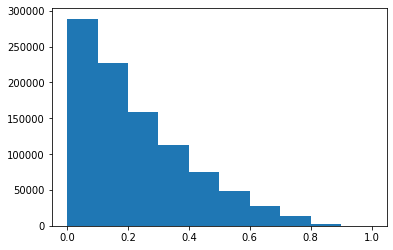

In [103]:
sanders_trump_sims = []

for i in sanders_user_indices:
    for j in trump_user_indices:
        if i not in trump_user_indices and j not in sanders_user_indices:
            sanders_trump_sims.append(subreddit_cosine_sims[i,j])
        
plt.hist(sanders_trump_sims, range = (0,1))
plt.show()

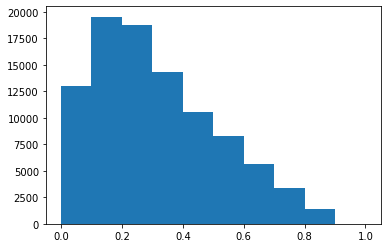

In [104]:
sanders_clinton_sims = []

for i in sanders_user_indices:
    for j in clinton_user_indices:
        if i not in clinton_user_indices and j not in sanders_user_indices:
            sanders_clinton_sims.append(subreddit_cosine_sims[i,j])
        
plt.hist(sanders_clinton_sims, range = (0,1))
plt.show()

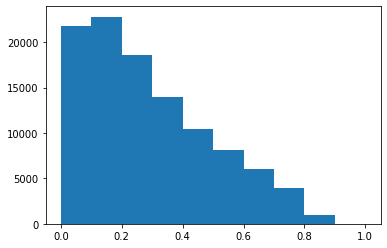

In [105]:
clinton_trump_sims = []

for i in clinton_user_indices:
    for j in trump_user_indices:
        if i not in trump_user_indices and j not in clinton_user_indices:
            clinton_trump_sims.append(subreddit_cosine_sims[i,j])
        
plt.hist(clinton_trump_sims, range = (0,1))
plt.show()

## Try 10 comments per user

In [109]:
len([i for i in author_index_lists if len(i) >= 5])

7957

In [112]:
print(len([i for i in author_index_lists if len(i) >= 10]))

5254


In [124]:
print(len([i for i in range(len(author_index_lists)) if len(author_index_lists[i]) >= 10 and i in sanders_user_indices]))
print(len([i for i in range(len(author_index_lists)) if len(author_index_lists[i]) >= 10 and i in trump_user_indices]))
print(len([i for i in range(len(author_index_lists)) if len(author_index_lists[i]) >= 10 and i in clinton_user_indices]))
print(len([i for i in range(len(author_index_lists)) if len(author_index_lists[i]) >= 10 and i in none_user_indices]))


1134
532
108
3355


In [126]:
print(len([i for i in range(len(author_index_lists)) if len(author_index_lists[i]) >= 5 and i in sanders_user_indices]))
print(len([i for i in range(len(author_index_lists)) if len(author_index_lists[i]) >= 5 and i in trump_user_indices]))
print(len([i for i in range(len(author_index_lists)) if len(author_index_lists[i]) >= 5 and i in clinton_user_indices]))
print(len([i for i in range(len(author_index_lists)) if len(author_index_lists[i]) >= 5 and i in none_user_indices]))


1296
644
123
5102


In [145]:
user_tfidf_m = lil_matrix((len([i for i in author_index_lists if len(i) >= 10]), comment_tfidf.shape[1]))

In [146]:
good_indices = []
idx = 0
for i in range(len(author_names)):
    if len(author_index_lists[i]) >= 10:
        curr_indices = random.sample(author_index_lists[i], 10)
        user_tfidf_m[idx] = comment_tfidf[curr_indices].sum(axis=0)
        good_indices.append(i)
        idx += 1
        

In [147]:
user_tfidf_m = csr_matrix(user_tfidf_m)
user_tfidf_norms_m = np.zeros(user_tfidf_m.shape[0])
user_tfidf_norms_m = norm(user_tfidf_m.toarray(), axis=1)

In [151]:
user_tfidf_normalized_m = csr_matrix(user_tfidf_m / user_tfidf_norms_m[:, np.newaxis])

In [161]:
subreddit_cosine_sims_m = user_tfidf_normalized_m.dot(csc_matrix(user_tfidf_normalized_m.T)).toarray()


In [162]:
for i in range(user_tfidf_normalized_m.shape[0]):
    subreddit_cosine_sims_m[i,i] = 0

In [163]:
subreddit_cosine_sims_m[:10, :10]

array([[0.        , 0.23861054, 0.14542915, 0.19514236, 0.21724073,
        0.24144117, 0.2108527 , 0.24146454, 0.22710855, 0.21716996],
       [0.23861054, 0.        , 0.19207783, 0.24472836, 0.22468539,
        0.28823279, 0.28531433, 0.31214507, 0.28133428, 0.27142665],
       [0.14542915, 0.19207783, 0.        , 0.17341848, 0.18215892,
        0.17674163, 0.14985353, 0.17961499, 0.16255594, 0.18098912],
       [0.19514236, 0.24472836, 0.17341848, 0.        , 0.24886536,
        0.24794315, 0.30680182, 0.31715432, 0.28827264, 0.28899159],
       [0.21724073, 0.22468539, 0.18215892, 0.24886536, 0.        ,
        0.25188421, 0.24257464, 0.28266084, 0.26176225, 0.26956942],
       [0.24144117, 0.28823279, 0.17674163, 0.24794315, 0.25188421,
        0.        , 0.29930572, 0.32839314, 0.33428686, 0.28629568],
       [0.2108527 , 0.28531433, 0.14985353, 0.30680182, 0.24257464,
        0.29930572, 0.        , 0.33961224, 0.28032498, 0.30529463],
       [0.24146454, 0.31214507, 0.1796149

In [167]:
most_similar_user = np.zeros(user_tfidf_normalized_m.shape[0], dtype = np.int32)
for i in range(user_tfidf_normalized_m.shape[0]):
    most_similar_user[i] = np.argsort(subreddit_cosine_sims_m[i])[-1]

In [168]:
most_similar_user[:10]

array([4500, 4356, 4853, 1156, 1908,  945, 4591,  473, 4925,  893],
      dtype=int32)

In [169]:
[subreddit_cosine_sims_m[i, most_similar_user[i]] for i in range(10)]

[0.3712034771821758,
 0.4233080227083595,
 0.3048783004128825,
 0.4322492443828797,
 0.38535433174398365,
 0.4310841315170676,
 0.44393519302160256,
 0.47649495546716497,
 0.4366715139314585,
 0.4488603269802892]

In [152]:
author_names = [author_names[i] for i in good_indices]
subreddit_tf = subreddit_tf[good_indices, :]

In [153]:
author_reverse_dict = {author_names[i]:i for i in range(len(author_names))}

In [154]:
num_sanders = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['sandersforpresident']]) for k in author_names}
num_trump = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['the_donald']]) for k in author_names}
num_clinton = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['hillaryclinton']]) for k in author_names}
num_politics = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['politics']]) for k in author_names}


In [155]:
comment_threshold = 10

In [156]:
sanders_user_indices = [i for i in range(subreddit_tf.shape[0]) if num_sanders[author_names[i]] >= comment_threshold]
trump_user_indices = [i for i in range(subreddit_tf.shape[0]) if num_trump[author_names[i]] >= comment_threshold]
clinton_user_indices = [i for i in range(subreddit_tf.shape[0]) if num_clinton[author_names[i]] >= comment_threshold]

In [157]:
none_user_indices = [i for i in range(subreddit_tf.shape[0]) if num_sanders[author_names[i]] == 0 and 
                     num_trump[author_names[i]] == 0 and
                     num_clinton[author_names[i]] == 0]

In [158]:
print(len(sanders_user_indices))
print(len(trump_user_indices))
print(len(clinton_user_indices))
print(len(none_user_indices))

1134
532
108
2319


In [159]:
print(len(set(sanders_user_indices).intersection(trump_user_indices)))
print(len(set(sanders_user_indices).intersection(clinton_user_indices)))
print(len(set(trump_user_indices).intersection(clinton_user_indices)))

190
66
18


In [170]:
np.sum(subreddit_cosine_sims_m[sanders_user_indices, :][:,sanders_user_indices]) / \
(len(sanders_user_indices) * (len(sanders_user_indices)-1))

0.19288444992544784

In [171]:
np.sum(subreddit_cosine_sims_m[trump_user_indices, :][:,trump_user_indices]) / \
(len(trump_user_indices) * (len(trump_user_indices)-1))

0.17563576412155807

In [172]:
np.sum(subreddit_cosine_sims_m[clinton_user_indices, :][:,clinton_user_indices]) / \
(len(clinton_user_indices) * (len(clinton_user_indices)-1))

0.22364639482724233

In [173]:
np.sum(subreddit_cosine_sims_m[none_user_indices, :][:,none_user_indices]) / \
(len(none_user_indices) * (len(none_user_indices)-1))

0.19935499999311546

In [174]:
np.sum(subreddit_cosine_sims_m) / (subreddit_cosine_sims_m.shape[0] * (subreddit_cosine_sims_m.shape[1] - 1))

0.19392449845126963

In [175]:
print(np.sum(subreddit_cosine_sims_m[sanders_user_indices, :][:,trump_user_indices]) / \
((len(sanders_user_indices) * len(trump_user_indices)) - \
len(set(sanders_user_indices).intersection(trump_user_indices))))

print(np.sum(subreddit_cosine_sims_m[sanders_user_indices, :][:,clinton_user_indices]) / \
((len(sanders_user_indices) * len(clinton_user_indices)) - \
len(set(sanders_user_indices).intersection(clinton_user_indices))))

print(np.sum(subreddit_cosine_sims_m[clinton_user_indices, :][:,trump_user_indices]) / \
((len(clinton_user_indices) * len(trump_user_indices)) - \
len(set(clinton_user_indices).intersection(trump_user_indices))))

print()
print(np.sum(subreddit_cosine_sims_m[sanders_user_indices, :][:,none_user_indices]) / \
((len(sanders_user_indices) * len(none_user_indices))))
print(np.sum(subreddit_cosine_sims_m[trump_user_indices, :][:,none_user_indices]) / \
((len(trump_user_indices) * len(none_user_indices))))
print(np.sum(subreddit_cosine_sims_m[clinton_user_indices, :][:,none_user_indices]) / \
((len(clinton_user_indices) * len(none_user_indices))))

0.1827294648398532
0.20716723134327786
0.19510258557366592

0.19488556805113727
0.18483218990890482
0.2079241832164273


In [176]:
print(len(set(most_similar_user[sanders_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user[sanders_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user[sanders_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user[sanders_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user[sanders_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user[sanders_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))
print()
print(len(set(most_similar_user[trump_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user[trump_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user[trump_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user[trump_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user[trump_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user[trump_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))
print()
print(len(set(most_similar_user[clinton_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user[clinton_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user[clinton_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user[clinton_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user[clinton_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user[clinton_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))



47
0.04144620811287478
12
0.022556390977443608
7
0.06481481481481481

28
0.024691358024691357
16
0.03007518796992481
5
0.046296296296296294

10
0.008818342151675485
2
0.0037593984962406013
0
0.0


In [177]:
sanders_sanders_sims = []

for i in range(len(sanders_user_indices)):
    for j in range(i+1, len(sanders_user_indices)):
        sanders_sanders_sims.append(subreddit_cosine_sims_m[sanders_user_indices[i],sanders_user_indices[j]])

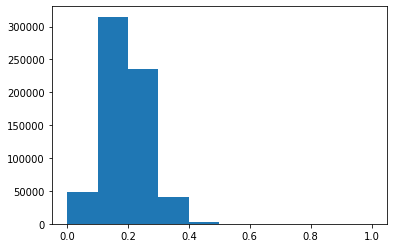

In [178]:
plt.hist(sanders_sanders_sims, range = (0, 1))
plt.show()

In [179]:
trump_trump_sims = []

for i in range(len(trump_user_indices)):
    for j in range(i+1, len(trump_user_indices)):
        trump_trump_sims.append(subreddit_cosine_sims_m[trump_user_indices[i],trump_user_indices[j]])

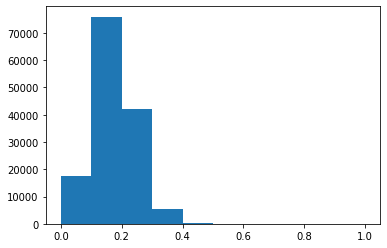

In [180]:
plt.hist(trump_trump_sims, range = (0,1))
plt.show()

In [183]:
clinton_clinton_sims = []

for i in range(len(clinton_user_indices)):
    for j in range(i+1, len(clinton_user_indices)):
        clinton_clinton_sims.append(subreddit_cosine_sims_m[clinton_user_indices[i],clinton_user_indices[j]])

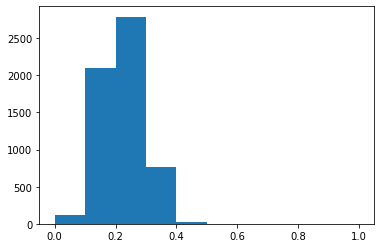

In [184]:
plt.hist(clinton_clinton_sims, range = (0,1))
plt.show()

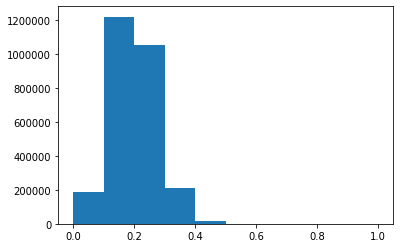

In [185]:
none_none_sims = []

for i in range(len(none_user_indices)):
    for j in range(i+1, len(none_user_indices)):
        none_none_sims.append(subreddit_cosine_sims_m[none_user_indices[i],none_user_indices[j]])
        
plt.hist(none_none_sims, range = (0,1))
plt.show()

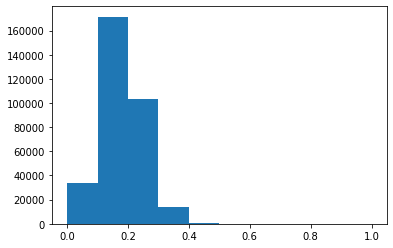

In [186]:
sanders_trump_sims = []

for i in sanders_user_indices:
    for j in trump_user_indices:
        if i not in trump_user_indices and j not in sanders_user_indices:
            sanders_trump_sims.append(subreddit_cosine_sims_m[i,j])
        
plt.hist(sanders_trump_sims, range = (0,1))
plt.show()

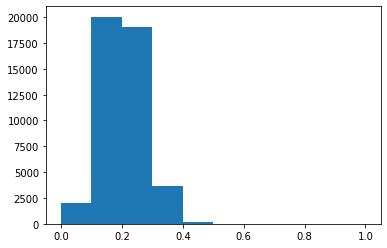

In [187]:
sanders_clinton_sims = []

for i in sanders_user_indices:
    for j in clinton_user_indices:
        if i not in clinton_user_indices and j not in sanders_user_indices:
            sanders_clinton_sims.append(subreddit_cosine_sims_m[i,j])
        
plt.hist(sanders_clinton_sims, range = (0,1))
plt.show()

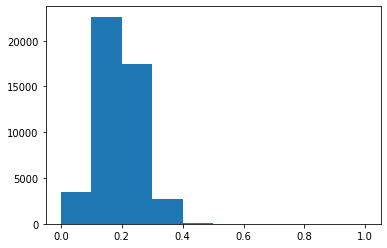

In [188]:
clinton_trump_sims = []

for i in clinton_user_indices:
    for j in trump_user_indices:
        if i not in trump_user_indices and j not in clinton_user_indices:
            clinton_trump_sims.append(subreddit_cosine_sims_m[i,j])
        
plt.hist(clinton_trump_sims, range = (0,1))
plt.show()

## Use SVD

In [190]:
user_svd = TruncatedSVD(n_components = 100)
user_svd_points = user_svd.fit_transform(user_tfidf_m)

In [192]:
user_svd_norms = norm(user_svd_points, axis=1)

In [193]:
user_svd_norms[:10]

array([2.08314362, 2.33213009, 1.71683248, 3.01522608, 2.44785637,
       2.61072912, 2.3575209 , 2.68044509, 2.62834939, 2.65798583])

In [194]:
user_svd_normalized = user_svd_points / user_svd_norms[:, np.newaxis]

In [42]:
svd_cosine_sims = user_svd_normalized.dot(csc_matrix(us))

In [43]:
for i in range(20):
    chunk1 = csr_matrix(user_svd_normalized[i*1000 : (i+1)*1000, :])
    for j in range(i,20):
        chunk2 = csc_matrix(user_svd_normalized[j*1000 : (j+1)*1000, :].T)
        svd_cosine_sims[i*1000 : (i+1)*1000, j*1000 : (j+1)*1000] = chunk1.dot(chunk2).toarray()


In [44]:
svd_cosine_sims[:10,:10]

array([[1.        , 0.59783156, 0.40808062, 0.62739787, 0.78348443,
        0.58775661, 0.79592686, 0.83958192, 0.11066431, 0.77334763],
       [0.59783156, 1.        , 0.3494453 , 0.70089828, 0.6741954 ,
        0.50892622, 0.69959947, 0.70931297, 0.09492274, 0.68977752],
       [0.40808062, 0.3494453 , 1.        , 0.72766971, 0.20737886,
        0.34067713, 0.3402866 , 0.35578086, 0.04695287, 0.35552503],
       [0.62739787, 0.70089828, 0.72766971, 1.        , 0.55633985,
        0.47124046, 0.67937756, 0.70789241, 0.06972697, 0.67992669],
       [0.78348443, 0.6741954 , 0.20737886, 0.55633985, 1.        ,
        0.68528983, 0.90414785, 0.93492961, 0.13880342, 0.79163326],
       [0.58775661, 0.50892622, 0.34067713, 0.47124046, 0.68528983,
        1.        , 0.63408559, 0.61578314, 0.15669713, 0.66496741],
       [0.79592686, 0.69959947, 0.3402866 , 0.67937756, 0.90414785,
        0.63408559, 1.        , 0.93237353, 0.10502594, 0.85535597],
       [0.83958192, 0.70931297, 0.3557808

In [45]:
for i in range(subreddit_tfidf.shape[0]):
    svd_cosine_sims[i,i] = 0

In [46]:
for i in range(20):
    for j in range(i):
        svd_cosine_sims[i*1000 : (i+1)*1000, j*1000 : (j+1)*1000] = \
svd_cosine_sims[j*1000 : (j+1)*1000, i*1000 : (i+1)*1000].T

In [47]:
svd_cosine_sims[3872,10415]

0.508960569591113

In [48]:
svd_cosine_sims[10415,3872]

0.508960569591113

In [49]:
# with open("stored_variables/user_subreddit_tfidf_cossims_svd.pickle", "wb") as f:
#     pickle.dump(svd_cosine_sims, f)
    
with open("stored_variables/user_subreddit_tfidf_cossims_svd.pickle", "rb") as f:
    svd_cosine_sims = pickle.load(f)

In [50]:
most_similar_user_svd = np.zeros(subreddit_tfidf.shape[0], dtype = np.int32)

In [51]:
for i in range(subreddit_tfidf.shape[0]):
    most_similar_user_svd[i] = np.argsort(svd_cosine_sims[i])[-1]

In [52]:
most_similar_user_svd[:10]

array([   26,    16,   828,   946,    55,   387,    64,   942, 12012,
          43], dtype=int32)

In [53]:
[svd_cosine_sims[i, most_similar_user_svd[i]] for i in range(10)]

[0.9050887691107955,
 0.8608446140501907,
 0.9729882375039631,
 0.9844443954397757,
 0.9586222798420735,
 0.7786442459705354,
 0.9594219256049812,
 0.9672330120406901,
 0.9878724312473057,
 0.9254776235273965]

In [54]:
np.sum(svd_cosine_sims[sanders_user_indices, :][:,sanders_user_indices]) / \
(len(sanders_user_indices) * (len(sanders_user_indices)-1))

0.2746565831547423

In [50]:
np.sum(svd_cosine_sims[trump_user_indices, :][:,trump_user_indices]) / \
(len(trump_user_indices) * (len(trump_user_indices)-1))

0.21710989100375805

In [51]:
np.sum(svd_cosine_sims[clinton_user_indices, :][:,clinton_user_indices]) / \
(len(clinton_user_indices) * (len(clinton_user_indices)-1))

0.21334667040884386

In [52]:
np.sum(svd_cosine_sims[none_user_indices, :][:,none_user_indices]) / \
(len(none_user_indices) * (len(none_user_indices)-1))

0.2539389270388249

In [53]:
np.sum(svd_cosine_sims) / (svd_cosine_sims.shape[0] * (svd_cosine_sims.shape[1] - 1))

0.24007926917094521

In [54]:
print(np.sum(svd_cosine_sims[sanders_user_indices, :][:,trump_user_indices]) / \
((len(sanders_user_indices) * len(trump_user_indices)) - \
len(set(sanders_user_indices).intersection(trump_user_indices))))

print(np.sum(svd_cosine_sims[sanders_user_indices, :][:,clinton_user_indices]) / \
((len(sanders_user_indices) * len(clinton_user_indices)) - \
len(set(sanders_user_indices).intersection(clinton_user_indices))))

print(np.sum(svd_cosine_sims[clinton_user_indices, :][:,trump_user_indices]) / \
((len(clinton_user_indices) * len(trump_user_indices)) - \
len(set(clinton_user_indices).intersection(trump_user_indices))))

print()
print(np.sum(svd_cosine_sims[sanders_user_indices, :][:,none_user_indices]) / \
((len(sanders_user_indices) * len(none_user_indices))))
print(np.sum(svd_cosine_sims[trump_user_indices, :][:,none_user_indices]) / \
((len(trump_user_indices) * len(none_user_indices))))
print(np.sum(svd_cosine_sims[clinton_user_indices, :][:,none_user_indices]) / \
((len(clinton_user_indices) * len(none_user_indices))))

0.20419046548735034
0.21317712992273619
0.17377190941889184

0.21264203696022654
0.21382045741031738
0.16923178232681446


In [55]:
print(len(set(most_similar_user_svd[sanders_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user_svd[sanders_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user_svd[sanders_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user_svd[sanders_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user_svd[sanders_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user_svd[sanders_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))
print()
print(len(set(most_similar_user_svd[trump_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user_svd[trump_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user_svd[trump_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user_svd[trump_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user_svd[trump_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user_svd[trump_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))
print()
print(len(set(most_similar_user_svd[clinton_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user_svd[clinton_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user_svd[clinton_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user_svd[clinton_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user_svd[clinton_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user_svd[clinton_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))



385
0.2472703917790623
84
0.09140369967355821
23
0.1678832116788321

77
0.04945407835581246
129
0.14036996735582155
9
0.06569343065693431

32
0.020552344251766216
8
0.008705114254624592
12
0.08759124087591241


In [55]:
sanders_sanders_sims = []

for i in range(len(sanders_user_indices)):
    for j in range(i+1, len(sanders_user_indices)):
        sanders_sanders_sims.append(svd_cosine_sims[sanders_user_indices[i],sanders_user_indices[j]])

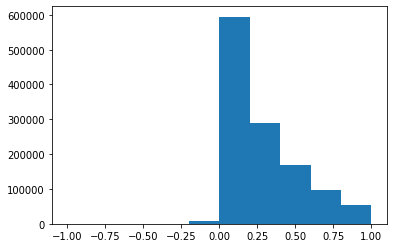

In [56]:
plt.hist(sanders_sanders_sims, range = (-1,1))
plt.show()

In [57]:
trump_trump_sims = []

for i in range(len(trump_user_indices)):
    for j in range(i+1, len(trump_user_indices)):
        trump_trump_sims.append(svd_cosine_sims[trump_user_indices[i],trump_user_indices[j]])

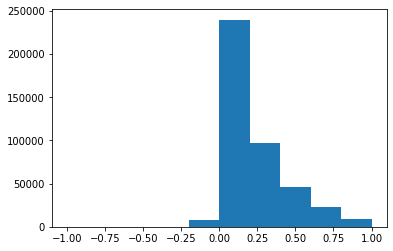

In [58]:
plt.hist(trump_trump_sims, range = (-1,1) )
plt.show()

In [59]:
clinton_clinton_sims = []

for i in range(len(clinton_user_indices)):
    for j in range(i+1, len(clinton_user_indices)):
        clinton_clinton_sims.append(svd_cosine_sims[clinton_user_indices[i],clinton_user_indices[j]])

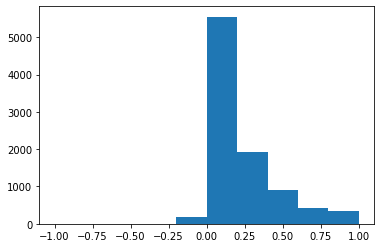

In [60]:
plt.hist(clinton_clinton_sims, range = (-1,1))
plt.show()

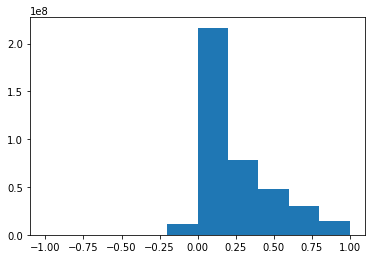

In [61]:
plt.hist(svd_cosine_sims.flatten(), range=(-1,1))
plt.show()

In [63]:
most_similar_50_users_svd = np.zeros((subreddit_tfidf.shape[0],50), dtype = np.int32)

for i in range(subreddit_tfidf.shape[0]):
    most_similar_50_users_svd[i] = np.flip(np.argsort(svd_cosine_sims[i])[-50:])


In [64]:
most_similar_50_users_svd[0]

array([  26,   14,    7,  531,   10,   35,  942,  882,    6,  102,  494,
          4,  111,   48,  353,  288,   64,    9,  131,   43,  105,   20,
        418,  839,   55,  571,  168,   88,   37,  383,  276,  425,   62,
         70, 1178,  644,   22,  240,  109,   93,   95,  143,  473,  307,
        504,   80,   44,   85,  609, 1055], dtype=int32)

In [65]:
most_similar_50_set = [set(i) for i in most_similar_50_users_svd]

In [81]:
print(np.mean([len(most_similar_50_set[i].intersection(sanders_user_indices)) for i in sanders_user_indices]))
print(np.median([len(most_similar_50_set[i].intersection(sanders_user_indices)) for i in sanders_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set[i].intersection(sanders_user_indices)) >= 10]))


14.33140655105973
6.0
103.33847141939627
203.71379310344827


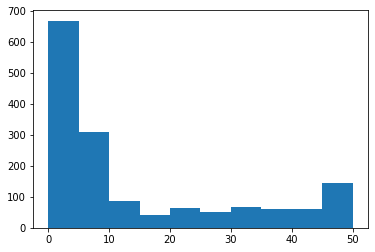

In [82]:
plt.hist([len(most_similar_50_set[i].intersection(sanders_user_indices)) for i in sanders_user_indices], range = (0,50))
plt.show()

In [83]:
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set[i].intersection(sanders_user_indices)) >= 10]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set[i].intersection(sanders_user_indices)) >= 30]))

580
335


7.269858541893362
3.0
140
77
97.14907508161045
253.77857142857144


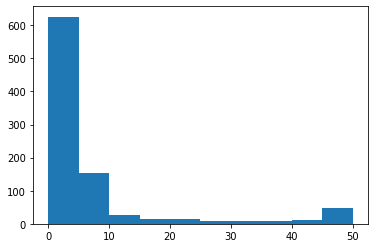

In [84]:
print(np.mean([len(most_similar_50_set[i].intersection(trump_user_indices)) for i in trump_user_indices]))
print(np.median([len(most_similar_50_set[i].intersection(trump_user_indices)) for i in trump_user_indices]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set[i].intersection(trump_user_indices)) >= 10]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set[i].intersection(trump_user_indices)) >= 30]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set[i].intersection(trump_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set[i].intersection(trump_user_indices)) for i in trump_user_indices], range = (0,50))
plt.show()

1.8759124087591241
1.0
2
0
95.81751824817518
152.5


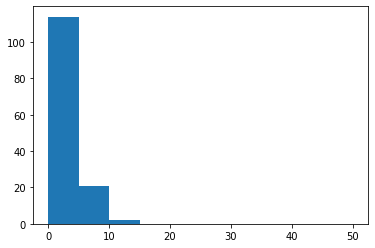

In [85]:
print(np.mean([len(most_similar_50_set[i].intersection(clinton_user_indices)) for i in clinton_user_indices]))
print(np.median([len(most_similar_50_set[i].intersection(clinton_user_indices)) for i in clinton_user_indices]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set[i].intersection(clinton_user_indices)) >= 10]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set[i].intersection(clinton_user_indices)) >= 30]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set[i].intersection(clinton_user_indices)) >= 10]))


plt.hist([len(most_similar_50_set[i].intersection(clinton_user_indices)) for i in clinton_user_indices], range = (0,50))
plt.show()

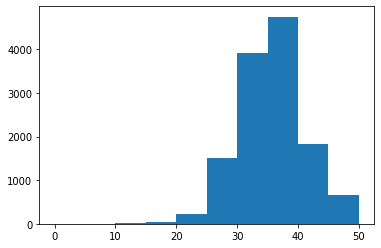

In [66]:
plt.hist([len(most_similar_50_set[i].intersection(none_user_indices)) for i in none_user_indices], range = (0,50))
plt.show()

## Try with Music and HipHopHeads

In [68]:
num_music = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['music']]) for k in author_names}
num_hhh = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['hiphopheads']]) for k in author_names}


In [69]:
music_user_indices = [i for i in range(subreddit_tf.shape[0]) if num_music[author_names[i]] >= comment_threshold]
print(len(music_user_indices))
hhh_user_indices = [i for i in range(subreddit_tf.shape[0]) if num_hhh[author_names[i]] >= comment_threshold]
print(len(hhh_user_indices))


2176
590


In [88]:
np.sum(svd_cosine_sims[music_user_indices, :][:,music_user_indices]) / \
(len(music_user_indices) * (len(music_user_indices)-1))

0.3541934109154698

In [89]:
np.sum(svd_cosine_sims[hhh_user_indices, :][:,hhh_user_indices]) / \
(len(hhh_user_indices) * (len(hhh_user_indices)-1))

0.25303707224553496

In [90]:
print(np.sum(svd_cosine_sims[music_user_indices, :][:,hhh_user_indices]) / \
((len(music_user_indices) * len(hhh_user_indices)) - \
len(set(music_user_indices).intersection(hhh_user_indices))))


0.2368393542015716


In [91]:
print(len(set(most_similar_user_svd[music_user_indices]).intersection(music_user_indices)))
print(len(set(most_similar_user_svd[music_user_indices]).intersection(music_user_indices))/len(music_user_indices))
print(len(set(most_similar_user_svd[music_user_indices]).intersection(hhh_user_indices)))
print(len(set(most_similar_user_svd[music_user_indices]).intersection(hhh_user_indices))/len(hhh_user_indices))

print(len(set(most_similar_user_svd[hhh_user_indices]).intersection(hhh_user_indices)))
print(len(set(most_similar_user_svd[hhh_user_indices]).intersection(hhh_user_indices))/len(hhh_user_indices))
print(len(set(most_similar_user_svd[hhh_user_indices]).intersection(music_user_indices)))
print(len(set(most_similar_user_svd[hhh_user_indices]).intersection(music_user_indices))/len(music_user_indices))

356
0.1636029411764706
74
0.12542372881355932
143
0.2423728813559322
101
0.04641544117647059


In [70]:
music_music_sims = []

for i in range(len(music_user_indices)):
    for j in range(i+1, len(music_user_indices)):
        music_music_sims.append(svd_cosine_sims[music_user_indices[i],music_user_indices[j]])

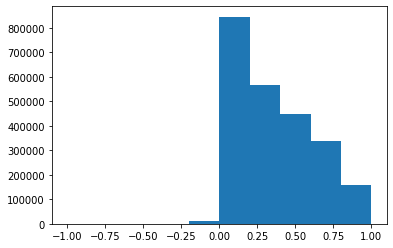

In [71]:
plt.hist(music_music_sims, range = (-1,1))
plt.show()

In [72]:
hhh_hhh_sims = []

for i in range(len(hhh_user_indices)):
    for j in range(i+1, len(hhh_user_indices)):
        hhh_hhh_sims.append(svd_cosine_sims[hhh_user_indices[i],hhh_user_indices[j]])

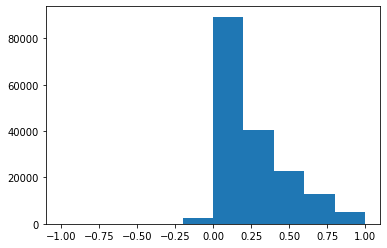

In [73]:
plt.hist(hhh_hhh_sims, range = (-1,1) )
plt.show()

8.943014705882353
8.0
899
0
37.385110294117645
39.22691879866518


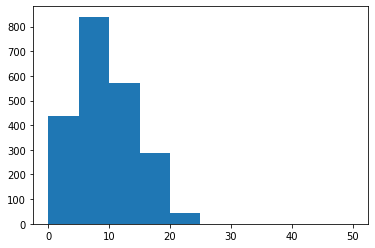

In [74]:
print(np.mean([len(most_similar_50_set[i].intersection(music_user_indices)) for i in music_user_indices]))
print(np.median([len(most_similar_50_set[i].intersection(music_user_indices)) for i in music_user_indices]))
print(sum([1 for i in music_user_indices if len(most_similar_50_set[i].intersection(music_user_indices)) >= 10]))
print(sum([1 for i in music_user_indices if len(most_similar_50_set[i].intersection(music_user_indices)) >= 30]))
print(np.mean([num_music[author_names[i]] for i in music_user_indices]))
print(np.mean([num_music[author_names[i]] for i in music_user_indices if len(most_similar_50_set[i].intersection(music_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set[i].intersection(music_user_indices)) for i in music_user_indices], range = (0,50))
plt.show()

12.686440677966102
4.0
179
119
128.61016949152543
287.92737430167597


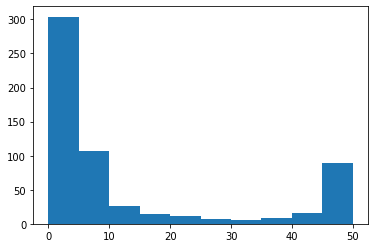

In [97]:
print(np.mean([len(most_similar_50_set[i].intersection(hhh_user_indices)) for i in hhh_user_indices]))
print(np.median([len(most_similar_50_set[i].intersection(hhh_user_indices)) for i in hhh_user_indices]))
print(sum([1 for i in hhh_user_indices if len(most_similar_50_set[i].intersection(hhh_user_indices)) >= 10]))
print(sum([1 for i in hhh_user_indices if len(most_similar_50_set[i].intersection(hhh_user_indices)) >= 30]))
print(np.mean([num_hhh[author_names[i]] for i in hhh_user_indices]))
print(np.mean([num_hhh[author_names[i]] for i in hhh_user_indices if len(most_similar_50_set[i].intersection(hhh_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set[i].intersection(hhh_user_indices)) for i in hhh_user_indices], range = (0,50))
plt.show()

## Check if similarities persist after removing SFP, TD, HC

In [14]:
subreddit_tfidf_modified = csc_matrix(subreddit_tfidf)
subreddit_tfidf_modified[:, subreddit_reverse_dict['sandersforpresident']] = 0
subreddit_tfidf_modified[:, subreddit_reverse_dict['the_donald']] = 0
subreddit_tfidf_modified[:, subreddit_reverse_dict['hillaryclinton']] = 0
subreddit_tfidf_modified = csr_matrix(subreddit_tfidf_modified)

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:127: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [16]:
user_svd_m = TruncatedSVD(n_components = 100)
user_svd_points_m = user_svd_m.fit_transform(subreddit_tfidf_modified)

In [17]:
user_svd_norms_m = np.zeros(subreddit_tfidf.shape[0])

In [18]:
for i in range(20):
    user_svd_norms_m[i*1000 : (i+1) * 1000] = norm(user_svd_points_m[i*1000 : (i+1) * 1000], axis=1)

In [19]:
user_svd_norms_m[:10]

array([ 1793.44357288,   761.0551272 ,  5456.60617868, 21367.63714488,
        3457.99131783,  2473.13588006,  1451.52846776, 10076.08660647,
         801.22764434,  7841.59335968])

In [20]:
user_svd_normalized_m = user_svd_points_m / user_svd_norms_m[:, np.newaxis]

In [21]:
svd_cosine_sims_m = np.zeros((subreddit_tfidf.shape[0], subreddit_tfidf.shape[0]))

In [22]:
for i in range(20):
    chunk1 = csr_matrix(user_svd_normalized_m[i*1000 : (i+1)*1000, :])
    for j in range(i,20):
        chunk2 = csc_matrix(user_svd_normalized_m[j*1000 : (j+1)*1000, :].T)
        svd_cosine_sims_m[i*1000 : (i+1)*1000, j*1000 : (j+1)*1000] = chunk1.dot(chunk2).toarray()


In [23]:
svd_cosine_sims_m[:10,:10]

array([[1.        , 0.69819874, 0.40739394, 0.62832866, 0.78634988,
        0.58905949, 0.79823031, 0.84207338, 0.10262892, 0.76900572],
       [0.69819874, 1.        , 0.40557935, 0.81964641, 0.78528008,
        0.58110145, 0.82243399, 0.83525074, 0.1006453 , 0.80725829],
       [0.40739394, 0.40557935, 1.        , 0.72755832, 0.21183822,
        0.35326269, 0.34223893, 0.35644356, 0.04452097, 0.35418931],
       [0.62832866, 0.81964641, 0.72755832, 1.        , 0.55982262,
        0.48146106, 0.68080072, 0.70859146, 0.0662739 , 0.68135108],
       [0.78634988, 0.78528008, 0.21183822, 0.55982262, 1.        ,
        0.68517481, 0.90404729, 0.93720192, 0.13325858, 0.79009851],
       [0.58905949, 0.58110145, 0.35326269, 0.48146106, 0.68517481,
        1.        , 0.64212969, 0.6255566 , 0.16437649, 0.68232976],
       [0.79823031, 0.82243399, 0.34223893, 0.68080072, 0.90404729,
        0.64212969, 1.        , 0.93279784, 0.09664204, 0.85173772],
       [0.84207338, 0.83525074, 0.3564435

In [24]:
for i in range(subreddit_tfidf.shape[0]):
    svd_cosine_sims_m[i,i] = 0

In [25]:
for i in range(20):
    for j in range(i):
        svd_cosine_sims_m[i*1000 : (i+1)*1000, j*1000 : (j+1)*1000] = \
svd_cosine_sims_m[j*1000 : (j+1)*1000, i*1000 : (i+1)*1000].T

In [26]:
svd_cosine_sims_m[3872,10415]

0.5095418193633449

In [27]:
svd_cosine_sims_m[10415,3872]

0.5095418193633449

In [28]:
most_similar_user_svd_m = np.zeros(subreddit_tfidf.shape[0], dtype = np.int32)

In [29]:
for i in range(subreddit_tfidf.shape[0]):
    most_similar_user_svd_m[i] = np.argsort(svd_cosine_sims_m[i])[-1]

In [30]:
most_similar_user_svd_m[:10]

array([   26,    46, 15665,   946,    10,   387,    64,   942, 12012,
          48], dtype=int32)

In [31]:
[svd_cosine_sims_m[i, most_similar_user_svd_m[i]] for i in range(10)]

[0.9016211896937636,
 0.9341721233427274,
 0.9686075509210403,
 0.9838868298324015,
 0.9634213755201699,
 0.7636870576672039,
 0.9541651378518858,
 0.9675890307830424,
 0.9856898533923323,
 0.9279269373501593]

In [39]:
np.sum(svd_cosine_sims_m[sanders_user_indices, :][:,sanders_user_indices]) / \
(len(sanders_user_indices) * (len(sanders_user_indices)-1))

0.263164447561359

In [40]:
np.sum(svd_cosine_sims_m[trump_user_indices, :][:,trump_user_indices]) / \
(len(trump_user_indices) * (len(trump_user_indices)-1))

0.21623163807739687

In [41]:
np.sum(svd_cosine_sims_m[clinton_user_indices, :][:,clinton_user_indices]) / \
(len(clinton_user_indices) * (len(clinton_user_indices)-1))

0.22392113887854653

In [42]:
np.sum(svd_cosine_sims_m[none_user_indices, :][:,none_user_indices]) / \
(len(none_user_indices) * (len(none_user_indices)-1))

0.2540551920083579

In [43]:
np.sum(svd_cosine_sims_m) / (svd_cosine_sims_m.shape[0] * (svd_cosine_sims_m.shape[1] - 1))

0.24675364407409253

In [44]:
print(np.sum(svd_cosine_sims_m[sanders_user_indices, :][:,trump_user_indices]) / \
((len(sanders_user_indices) * len(trump_user_indices)) - \
len(set(sanders_user_indices).intersection(trump_user_indices))))

print(np.sum(svd_cosine_sims_m[sanders_user_indices, :][:,clinton_user_indices]) / \
((len(sanders_user_indices) * len(clinton_user_indices)) - \
len(set(sanders_user_indices).intersection(clinton_user_indices))))

print(np.sum(svd_cosine_sims_m[clinton_user_indices, :][:,trump_user_indices]) / \
((len(clinton_user_indices) * len(trump_user_indices)) - \
len(set(clinton_user_indices).intersection(trump_user_indices))))

print()
print(np.sum(svd_cosine_sims_m[sanders_user_indices, :][:,none_user_indices]) / \
((len(sanders_user_indices) * len(none_user_indices))))
print(np.sum(svd_cosine_sims_m[trump_user_indices, :][:,none_user_indices]) / \
((len(trump_user_indices) * len(none_user_indices))))
print(np.sum(svd_cosine_sims_m[clinton_user_indices, :][:,none_user_indices]) / \
((len(clinton_user_indices) * len(none_user_indices))))

0.23611804227863864
0.22082826112713277
0.19205718653634363

0.2493614891030537
0.2255019885807114
0.18887873578199213


In [45]:
print(len(set(most_similar_user_svd_m[sanders_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user_svd_m[sanders_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user_svd_m[sanders_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user_svd_m[sanders_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user_svd_m[sanders_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user_svd_m[sanders_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))
print()
print(len(set(most_similar_user_svd_m[trump_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user_svd_m[trump_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user_svd_m[trump_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user_svd_m[trump_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user_svd_m[trump_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user_svd_m[trump_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))
print()
print(len(set(most_similar_user_svd_m[clinton_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user_svd_m[clinton_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user_svd_m[clinton_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user_svd_m[clinton_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user_svd_m[clinton_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user_svd_m[clinton_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))



177
0.11368015414258188
98
0.10663764961915125
27
0.19708029197080293

86
0.05523442517662171
66
0.07181719260065289
7
0.051094890510948905

11
0.007064868336544637
10
0.01088139281828074
4
0.029197080291970802


In [46]:
sanders_sanders_sims_m = []

for i in range(len(sanders_user_indices)):
    for j in range(i+1, len(sanders_user_indices)):
        sanders_sanders_sims_m.append(svd_cosine_sims_m[i,j])

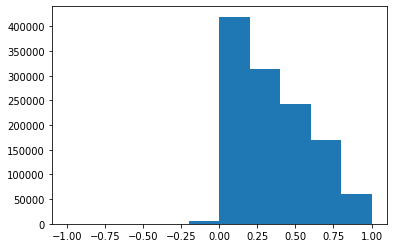

In [47]:
plt.hist(sanders_sanders_sims_m, range = (-1,1))
plt.show()

In [48]:
trump_trump_sims_m = []

for i in range(len(trump_user_indices)):
    for j in range(i+1, len(trump_user_indices)):
        trump_trump_sims_m.append(svd_cosine_sims_m[i,j])

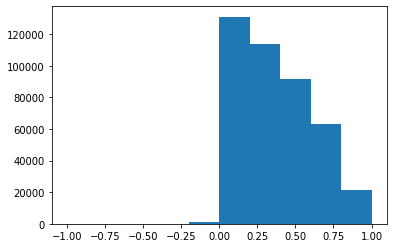

In [49]:
plt.hist(trump_trump_sims_m, range = (-1,1) )
plt.show()

In [50]:
clinton_clinton_sims_m = []

for i in range(len(clinton_user_indices)):
    for j in range(i+1, len(clinton_user_indices)):
        clinton_clinton_sims_m.append(svd_cosine_sims_m[i,j])

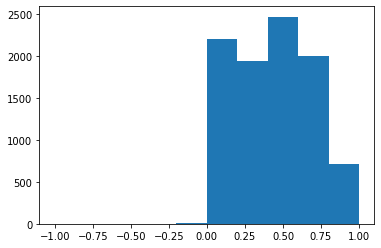

In [51]:
plt.hist(clinton_clinton_sims_m, range = (-1,1))
plt.show()

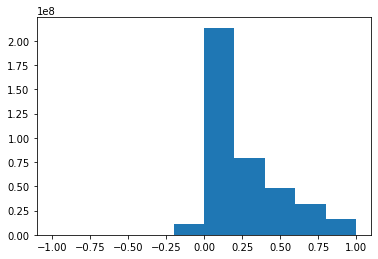

In [53]:
plt.hist(svd_cosine_sims_m.flatten(), range=(-1,1))
plt.show()

In [54]:
most_similar_50_users_svd_m = np.zeros((subreddit_tfidf.shape[0],50), dtype = np.int32)

for i in range(subreddit_tfidf.shape[0]):
    most_similar_50_users_svd_m[i] = np.flip(np.argsort(svd_cosine_sims_m[i])[-50:])


In [55]:
most_similar_50_users_svd_m[0]

array([  26,   14,    7,  531,   10,  942,  882,    6,   35,  102,  494,
          4,  111,  353,   48,   16,   43,  418,  109,    9,   20,   64,
        288,  131,  105,   55,   37,  571,   88,  839,  276,  644,   62,
        425,  168,   22, 1178,  307,   44,  504,  240,  473,   80,   93,
         95, 1055, 1532,   85,  383,   70], dtype=int32)

In [56]:
most_similar_50_set_m = [set(i) for i in most_similar_50_users_svd_m]

In [57]:
print(np.mean([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in sanders_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in sanders_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))


5.619139370584457
4.0
103.33847141939627
129.4787234042553
173.056


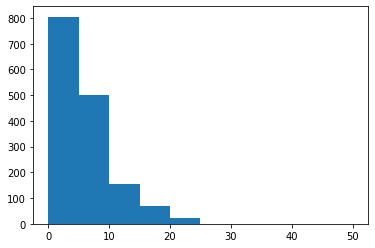

In [58]:
plt.hist([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in sanders_user_indices], range = (0,50))
plt.show()

In [65]:
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 30]))

752
250
0


3.189336235038085
3.0
215
18
0
97.14907508161045
109.76744186046511
49.111111111111114


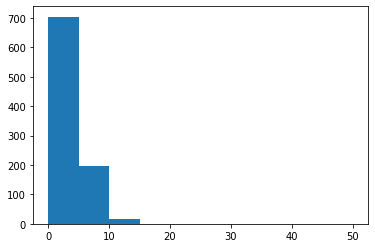

In [60]:
print(np.mean([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in trump_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in trump_user_indices]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 30]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in trump_user_indices], range = (0,50))
plt.show()

1.489051094890511
1.0
20
0
0


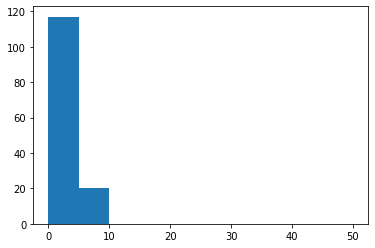

In [61]:
print(np.mean([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in clinton_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in clinton_user_indices]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 30]))
# print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices]))
# print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))


plt.hist([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in clinton_user_indices], range = (0,50))
plt.show()

### Similarities across groups

### Sanders

5.619139370584457
4.0
752
250
103.33847141939627
129.4787234042553
173.056


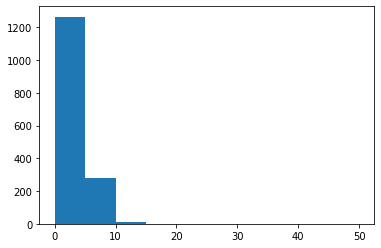

In [74]:
print(np.mean([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in sanders_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in sanders_user_indices]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in sanders_user_indices], range = (0,50))
plt.show()

2.823378291586384
3.0
292
12
14.23956326268465
17.65753424657534
11.416666666666666
103.33847141939627
133.93835616438355
63.833333333333336


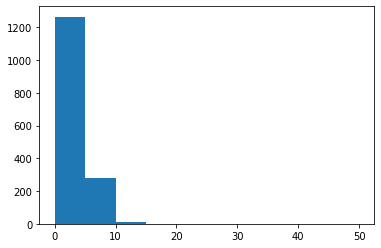

In [75]:
print(np.mean([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in sanders_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in sanders_user_indices]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))
print(np.mean([num_trump[author_names[i]] for i in sanders_user_indices]))
print(np.mean([num_trump[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(np.mean([num_trump[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in sanders_user_indices], range = (0,50))
plt.show()

0.6210661528580603
0.0
49
0
5.449582530507386
57.87755102040816
103.33847141939627
112.77551020408163


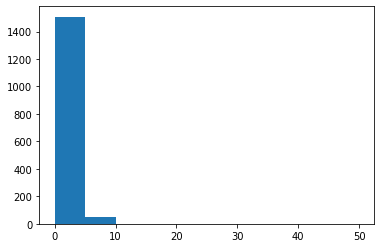

In [79]:
print(np.mean([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in sanders_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in sanders_user_indices]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))
print(np.mean([num_clinton[author_names[i]] for i in sanders_user_indices]))
print(np.mean([num_clinton[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
# print(np.mean([num_clinton[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
# print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in sanders_user_indices], range = (0,50))
plt.show()

### Trump

3.189336235038085
3.0
215
18
97.14907508161045
109.76744186046511
49.111111111111114


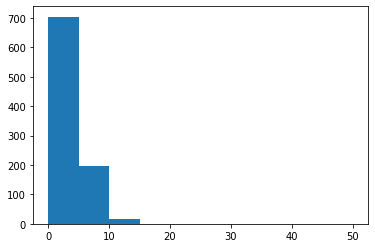

In [77]:
print(np.mean([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in trump_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in trump_user_indices]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in trump_user_indices], range = (0,50))
plt.show()

4.936887921653971
4.0
397
101
0
97.14907508161045
111.55667506297229
139.05940594059405
18.98150163220892
30.869017632241814
51.15841584158416


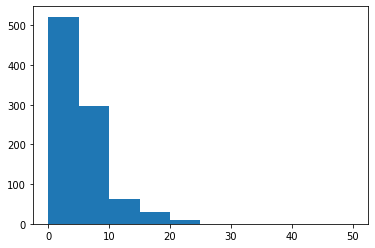

In [78]:
print(np.mean([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in trump_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in trump_user_indices]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 30]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))
print(np.mean([num_sanders[author_names[i]] for i in trump_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(np.mean([num_sanders[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in trump_user_indices], range = (0,50))
plt.show()

0.528835690968444
0.0
21
0
1.0848748639825898
1.619047619047619
97.14907508161045
208.23809523809524


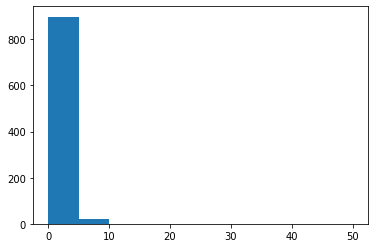

In [81]:
print(np.mean([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in trump_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in trump_user_indices]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))
print(np.mean([num_clinton[author_names[i]] for i in trump_user_indices]))
print(np.mean([num_clinton[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
# print(np.mean([num_clinton[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
# print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in trump_user_indices], range = (0,50))
plt.show()

### Clinton

1.489051094890511
1.0
20
0
95.81751824817518
210.65


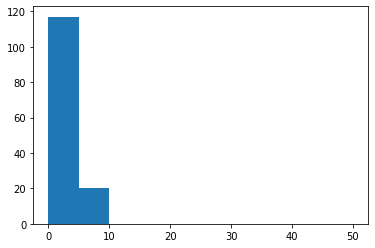

In [83]:
print(np.mean([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in clinton_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in clinton_user_indices]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
# print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in clinton_user_indices], range = (0,50))
plt.show()

7.08029197080292
5.0
77
39
95.81751824817518
127.98701298701299
143.28205128205127
125.0
176.7922077922078
89.71794871794872


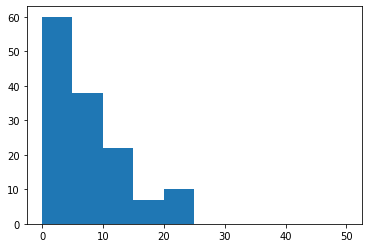

In [85]:
print(np.mean([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in clinton_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in clinton_user_indices]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))
print(np.mean([num_sanders[author_names[i]] for i in clinton_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(np.mean([num_sanders[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in clinton_user_indices], range = (0,50))
plt.show()

3.065693430656934
3.0
29
2
12.81021897810219
3.0344827586206895
12.5
95.81751824817518
69.06896551724138
102.5


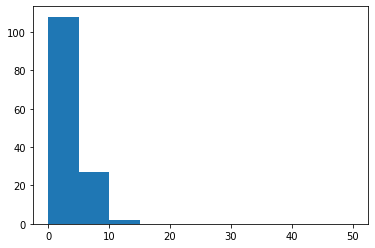

In [86]:
print(np.mean([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in clinton_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in clinton_user_indices]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))
print(np.mean([num_trump[author_names[i]] for i in clinton_user_indices]))
print(np.mean([num_trump[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(np.mean([num_trump[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in clinton_user_indices], range = (0,50))
plt.show()

In [135]:
## Use SVD

user_svd = TruncatedSVD(n_components = 100)
user_svd_points = user_svd.fit_transform(subreddit_tfidf)

user_svd_norms = np.zeros(subreddit_tfidf.shape[0])

for i in range(20):
    user_svd_norms[i*1000 : (i+1) * 1000] = norm(user_svd_points[i*1000 : (i+1) * 1000], axis=1)

user_svd_norms[:10]

user_svd_normalized = user_svd_points / user_svd_norms[:, np.newaxis]

svd_cosine_sims = np.zeros((subreddit_tfidf.shape[0], subreddit_tfidf.shape[0]))

for i in range(20):
    chunk1 = csr_matrix(user_svd_normalized[i*1000 : (i+1)*1000, :])
    for j in range(i,20):
        chunk2 = csc_matrix(user_svd_normalized[j*1000 : (j+1)*1000, :].T)
        svd_cosine_sims[i*1000 : (i+1)*1000, j*1000 : (j+1)*1000] = chunk1.dot(chunk2).toarray()


svd_cosine_sims[:10,:10]

for i in range(subreddit_tfidf.shape[0]):
    svd_cosine_sims[i,i] = 0

for i in range(20):
    for j in range(i):
        svd_cosine_sims[i*1000 : (i+1)*1000, j*1000 : (j+1)*1000] = \
svd_cosine_sims[j*1000 : (j+1)*1000, i*1000 : (i+1)*1000].T

svd_cosine_sims[3872,10415]

svd_cosine_sims[10415,3872]

# with open("stored_variables/user_subreddit_tfidf_cossims_svd.pickle", "wb") as f:
#     pickle.dump(svd_cosine_sims, f)
    
with open("stored_variables/user_subreddit_tfidf_cossims_svd.pickle", "rb") as f:
    svd_cosine_sims = pickle.load(f)

most_similar_user_svd = np.zeros(subreddit_tfidf.shape[0], dtype = np.int32)

for i in range(subreddit_tfidf.shape[0]):
    most_similar_user_svd[i] = np.argsort(svd_cosine_sims[i])[-1]

most_similar_user_svd[:10]

[svd_cosine_sims[i, most_similar_user_svd[i]] for i in range(10)]

np.sum(svd_cosine_sims[sanders_user_indices, :][:,sanders_user_indices]) / \
(len(sanders_user_indices) * (len(sanders_user_indices)-1))

np.sum(svd_cosine_sims[trump_user_indices, :][:,trump_user_indices]) / \
(len(trump_user_indices) * (len(trump_user_indices)-1))

np.sum(svd_cosine_sims[clinton_user_indices, :][:,clinton_user_indices]) / \
(len(clinton_user_indices) * (len(clinton_user_indices)-1))

np.sum(svd_cosine_sims[none_user_indices, :][:,none_user_indices]) / \
(len(none_user_indices) * (len(none_user_indices)-1))

np.sum(svd_cosine_sims) / (svd_cosine_sims.shape[0] * (svd_cosine_sims.shape[1] - 1))

print(np.sum(svd_cosine_sims[sanders_user_indices, :][:,trump_user_indices]) / \
((len(sanders_user_indices) * len(trump_user_indices)) - \
len(set(sanders_user_indices).intersection(trump_user_indices))))

print(np.sum(svd_cosine_sims[sanders_user_indices, :][:,clinton_user_indices]) / \
((len(sanders_user_indices) * len(clinton_user_indices)) - \
len(set(sanders_user_indices).intersection(clinton_user_indices))))

print(np.sum(svd_cosine_sims[clinton_user_indices, :][:,trump_user_indices]) / \
((len(clinton_user_indices) * len(trump_user_indices)) - \
len(set(clinton_user_indices).intersection(trump_user_indices))))

print()
print(np.sum(svd_cosine_sims[sanders_user_indices, :][:,none_user_indices]) / \
((len(sanders_user_indices) * len(none_user_indices))))
print(np.sum(svd_cosine_sims[trump_user_indices, :][:,none_user_indices]) / \
((len(trump_user_indices) * len(none_user_indices))))
print(np.sum(svd_cosine_sims[clinton_user_indices, :][:,none_user_indices]) / \
((len(clinton_user_indices) * len(none_user_indices))))

print(len(set(most_similar_user_svd[sanders_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user_svd[sanders_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user_svd[sanders_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user_svd[sanders_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user_svd[sanders_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user_svd[sanders_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))
print()
print(len(set(most_similar_user_svd[trump_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user_svd[trump_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user_svd[trump_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user_svd[trump_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user_svd[trump_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user_svd[trump_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))
print()
print(len(set(most_similar_user_svd[clinton_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user_svd[clinton_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user_svd[clinton_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user_svd[clinton_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user_svd[clinton_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user_svd[clinton_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))



sanders_sanders_sims = []

for i in range(len(sanders_user_indices)):
    for j in range(i+1, len(sanders_user_indices)):
        sanders_sanders_sims.append(svd_cosine_sims[sanders_user_indices[i],sanders_user_indices[j]])

plt.hist(sanders_sanders_sims, range = (-1,1))
plt.show()

trump_trump_sims = []

for i in range(len(trump_user_indices)):
    for j in range(i+1, len(trump_user_indices)):
        trump_trump_sims.append(svd_cosine_sims[trump_user_indices[i],trump_user_indices[j]])

plt.hist(trump_trump_sims, range = (-1,1) )
plt.show()

clinton_clinton_sims = []

for i in range(len(clinton_user_indices)):
    for j in range(i+1, len(clinton_user_indices)):
        clinton_clinton_sims.append(svd_cosine_sims[clinton_user_indices[i],clinton_user_indices[j]])

plt.hist(clinton_clinton_sims, range = (-1,1))
plt.show()

plt.hist(svd_cosine_sims.flatten(), range=(-1,1))
plt.show()

most_similar_50_users_svd = np.zeros((subreddit_tfidf.shape[0],50), dtype = np.int32)

for i in range(subreddit_tfidf.shape[0]):
    most_similar_50_users_svd[i] = np.flip(np.argsort(svd_cosine_sims[i])[-50:])


most_similar_50_users_svd[0]

most_similar_50_set = [set(i) for i in most_similar_50_users_svd]

print(np.mean([len(most_similar_50_set[i].intersection(sanders_user_indices)) for i in sanders_user_indices]))
print(np.median([len(most_similar_50_set[i].intersection(sanders_user_indices)) for i in sanders_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set[i].intersection(sanders_user_indices)) >= 10]))


plt.hist([len(most_similar_50_set[i].intersection(sanders_user_indices)) for i in sanders_user_indices], range = (0,50))
plt.show()

print(sum([1 for i in sanders_user_indices if len(most_similar_50_set[i].intersection(sanders_user_indices)) >= 10]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set[i].intersection(sanders_user_indices)) >= 30]))

print(np.mean([len(most_similar_50_set[i].intersection(trump_user_indices)) for i in trump_user_indices]))
print(np.median([len(most_similar_50_set[i].intersection(trump_user_indices)) for i in trump_user_indices]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set[i].intersection(trump_user_indices)) >= 10]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set[i].intersection(trump_user_indices)) >= 30]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set[i].intersection(trump_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set[i].intersection(trump_user_indices)) for i in trump_user_indices], range = (0,50))
plt.show()

print(np.mean([len(most_similar_50_set[i].intersection(clinton_user_indices)) for i in clinton_user_indices]))
print(np.median([len(most_similar_50_set[i].intersection(clinton_user_indices)) for i in clinton_user_indices]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set[i].intersection(clinton_user_indices)) >= 10]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set[i].intersection(clinton_user_indices)) >= 30]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set[i].intersection(clinton_user_indices)) >= 10]))


plt.hist([len(most_similar_50_set[i].intersection(clinton_user_indices)) for i in clinton_user_indices], range = (0,50))
plt.show()

plt.hist([len(most_similar_50_set[i].intersection(none_user_indices)) for i in none_user_indices], range = (0,50))
plt.show()

## Try with Music and HipHopHeads

num_music = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['music']]) for k in author_names}
num_hhh = {k:(subreddit_tf[author_reverse_dict[k], subreddit_reverse_dict['hiphopheads']]) for k in author_names}


music_user_indices = [i for i in range(subreddit_tf.shape[0]) if num_music[author_names[i]] >= comment_threshold]
print(len(music_user_indices))
hhh_user_indices = [i for i in range(subreddit_tf.shape[0]) if num_hhh[author_names[i]] >= comment_threshold]
print(len(hhh_user_indices))


np.sum(svd_cosine_sims[music_user_indices, :][:,music_user_indices]) / \
(len(music_user_indices) * (len(music_user_indices)-1))

np.sum(svd_cosine_sims[hhh_user_indices, :][:,hhh_user_indices]) / \
(len(hhh_user_indices) * (len(hhh_user_indices)-1))

print(np.sum(svd_cosine_sims[music_user_indices, :][:,hhh_user_indices]) / \
((len(music_user_indices) * len(hhh_user_indices)) - \
len(set(music_user_indices).intersection(hhh_user_indices))))


print(len(set(most_similar_user_svd[music_user_indices]).intersection(music_user_indices)))
print(len(set(most_similar_user_svd[music_user_indices]).intersection(music_user_indices))/len(music_user_indices))
print(len(set(most_similar_user_svd[music_user_indices]).intersection(hhh_user_indices)))
print(len(set(most_similar_user_svd[music_user_indices]).intersection(hhh_user_indices))/len(hhh_user_indices))

print(len(set(most_similar_user_svd[hhh_user_indices]).intersection(hhh_user_indices)))
print(len(set(most_similar_user_svd[hhh_user_indices]).intersection(hhh_user_indices))/len(hhh_user_indices))
print(len(set(most_similar_user_svd[hhh_user_indices]).intersection(music_user_indices)))
print(len(set(most_similar_user_svd[hhh_user_indices]).intersection(music_user_indices))/len(music_user_indices))

music_music_sims = []

for i in range(len(music_user_indices)):
    for j in range(i+1, len(music_user_indices)):
        music_music_sims.append(svd_cosine_sims[music_user_indices[i],music_user_indices[j]])

plt.hist(music_music_sims, range = (-1,1))
plt.show()

hhh_hhh_sims = []

for i in range(len(hhh_user_indices)):
    for j in range(i+1, len(hhh_user_indices)):
        hhh_hhh_sims.append(svd_cosine_sims[hhh_user_indices[i],hhh_user_indices[j]])

plt.hist(hhh_hhh_sims, range = (-1,1) )
plt.show()

print(np.mean([len(most_similar_50_set[i].intersection(music_user_indices)) for i in music_user_indices]))
print(np.median([len(most_similar_50_set[i].intersection(music_user_indices)) for i in music_user_indices]))
print(sum([1 for i in music_user_indices if len(most_similar_50_set[i].intersection(music_user_indices)) >= 10]))
print(sum([1 for i in music_user_indices if len(most_similar_50_set[i].intersection(music_user_indices)) >= 30]))
print(np.mean([num_music[author_names[i]] for i in music_user_indices]))
print(np.mean([num_music[author_names[i]] for i in music_user_indices if len(most_similar_50_set[i].intersection(music_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set[i].intersection(music_user_indices)) for i in music_user_indices], range = (0,50))
plt.show()

print(np.mean([len(most_similar_50_set[i].intersection(hhh_user_indices)) for i in hhh_user_indices]))
print(np.median([len(most_similar_50_set[i].intersection(hhh_user_indices)) for i in hhh_user_indices]))
print(sum([1 for i in hhh_user_indices if len(most_similar_50_set[i].intersection(hhh_user_indices)) >= 10]))
print(sum([1 for i in hhh_user_indices if len(most_similar_50_set[i].intersection(hhh_user_indices)) >= 30]))
print(np.mean([num_hhh[author_names[i]] for i in hhh_user_indices]))
print(np.mean([num_hhh[author_names[i]] for i in hhh_user_indices if len(most_similar_50_set[i].intersection(hhh_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set[i].intersection(hhh_user_indices)) for i in hhh_user_indices], range = (0,50))
plt.show()

## Check if similarities persist after removing SFP, TD, HC

subreddit_tfidf_modified = csc_matrix(subreddit_tfidf)
subreddit_tfidf_modified[:, subreddit_reverse_dict['sandersforpresident']] = 0
subreddit_tfidf_modified[:, subreddit_reverse_dict['the_donald']] = 0
subreddit_tfidf_modified[:, subreddit_reverse_dict['hillaryclinton']] = 0
subreddit_tfidf_modified = csr_matrix(subreddit_tfidf_modified)

user_svd_m = TruncatedSVD(n_components = 100)
user_svd_points_m = user_svd_m.fit_transform(subreddit_tfidf_modified)

user_svd_norms_m = np.zeros(subreddit_tfidf.shape[0])

for i in range(20):
    user_svd_norms_m[i*1000 : (i+1) * 1000] = norm(user_svd_points_m[i*1000 : (i+1) * 1000], axis=1)

user_svd_norms_m[:10]

user_svd_normalized_m = user_svd_points_m / user_svd_norms_m[:, np.newaxis]

svd_cosine_sims_m = np.zeros((subreddit_tfidf.shape[0], subreddit_tfidf.shape[0]))

for i in range(20):
    chunk1 = csr_matrix(user_svd_normalized_m[i*1000 : (i+1)*1000, :])
    for j in range(i,20):
        chunk2 = csc_matrix(user_svd_normalized_m[j*1000 : (j+1)*1000, :].T)
        svd_cosine_sims_m[i*1000 : (i+1)*1000, j*1000 : (j+1)*1000] = chunk1.dot(chunk2).toarray()


svd_cosine_sims_m[:10,:10]

for i in range(subreddit_tfidf.shape[0]):
    svd_cosine_sims_m[i,i] = 0

for i in range(20):
    for j in range(i):
        svd_cosine_sims_m[i*1000 : (i+1)*1000, j*1000 : (j+1)*1000] = \
svd_cosine_sims_m[j*1000 : (j+1)*1000, i*1000 : (i+1)*1000].T

svd_cosine_sims_m[3872,10415]

svd_cosine_sims_m[10415,3872]

most_similar_user_svd_m = np.zeros(subreddit_tfidf.shape[0], dtype = np.int32)

for i in range(subreddit_tfidf.shape[0]):
    most_similar_user_svd_m[i] = np.argsort(svd_cosine_sims_m[i])[-1]

most_similar_user_svd_m[:10]

[svd_cosine_sims_m[i, most_similar_user_svd_m[i]] for i in range(10)]

np.sum(svd_cosine_sims_m[sanders_user_indices, :][:,sanders_user_indices]) / \
(len(sanders_user_indices) * (len(sanders_user_indices)-1))

np.sum(svd_cosine_sims_m[trump_user_indices, :][:,trump_user_indices]) / \
(len(trump_user_indices) * (len(trump_user_indices)-1))

np.sum(svd_cosine_sims_m[clinton_user_indices, :][:,clinton_user_indices]) / \
(len(clinton_user_indices) * (len(clinton_user_indices)-1))

np.sum(svd_cosine_sims_m[none_user_indices, :][:,none_user_indices]) / \
(len(none_user_indices) * (len(none_user_indices)-1))

np.sum(svd_cosine_sims_m) / (svd_cosine_sims_m.shape[0] * (svd_cosine_sims_m.shape[1] - 1))

print(np.sum(svd_cosine_sims_m[sanders_user_indices, :][:,trump_user_indices]) / \
((len(sanders_user_indices) * len(trump_user_indices)) - \
len(set(sanders_user_indices).intersection(trump_user_indices))))

print(np.sum(svd_cosine_sims_m[sanders_user_indices, :][:,clinton_user_indices]) / \
((len(sanders_user_indices) * len(clinton_user_indices)) - \
len(set(sanders_user_indices).intersection(clinton_user_indices))))

print(np.sum(svd_cosine_sims_m[clinton_user_indices, :][:,trump_user_indices]) / \
((len(clinton_user_indices) * len(trump_user_indices)) - \
len(set(clinton_user_indices).intersection(trump_user_indices))))

print()
print(np.sum(svd_cosine_sims_m[sanders_user_indices, :][:,none_user_indices]) / \
((len(sanders_user_indices) * len(none_user_indices))))
print(np.sum(svd_cosine_sims_m[trump_user_indices, :][:,none_user_indices]) / \
((len(trump_user_indices) * len(none_user_indices))))
print(np.sum(svd_cosine_sims_m[clinton_user_indices, :][:,none_user_indices]) / \
((len(clinton_user_indices) * len(none_user_indices))))

print(len(set(most_similar_user_svd_m[sanders_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user_svd_m[sanders_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user_svd_m[sanders_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user_svd_m[sanders_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user_svd_m[sanders_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user_svd_m[sanders_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))
print()
print(len(set(most_similar_user_svd_m[trump_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user_svd_m[trump_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user_svd_m[trump_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user_svd_m[trump_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user_svd_m[trump_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user_svd_m[trump_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))
print()
print(len(set(most_similar_user_svd_m[clinton_user_indices]).intersection(sanders_user_indices)))
print(len(set(most_similar_user_svd_m[clinton_user_indices]).intersection(sanders_user_indices))/len(sanders_user_indices))
print(len(set(most_similar_user_svd_m[clinton_user_indices]).intersection(trump_user_indices)))
print(len(set(most_similar_user_svd_m[clinton_user_indices]).intersection(trump_user_indices))/len(trump_user_indices))
print(len(set(most_similar_user_svd_m[clinton_user_indices]).intersection(clinton_user_indices)))
print(len(set(most_similar_user_svd_m[clinton_user_indices]).intersection(clinton_user_indices))/len(clinton_user_indices))



sanders_sanders_sims_m = []

for i in range(len(sanders_user_indices)):
    for j in range(i+1, len(sanders_user_indices)):
        sanders_sanders_sims_m.append(svd_cosine_sims_m[i,j])

plt.hist(sanders_sanders_sims_m, range = (-1,1))
plt.show()

trump_trump_sims_m = []

for i in range(len(trump_user_indices)):
    for j in range(i+1, len(trump_user_indices)):
        trump_trump_sims_m.append(svd_cosine_sims_m[i,j])

plt.hist(trump_trump_sims_m, range = (-1,1) )
plt.show()

clinton_clinton_sims_m = []

for i in range(len(clinton_user_indices)):
    for j in range(i+1, len(clinton_user_indices)):
        clinton_clinton_sims_m.append(svd_cosine_sims_m[i,j])

plt.hist(clinton_clinton_sims_m, range = (-1,1))
plt.show()

plt.hist(svd_cosine_sims_m.flatten(), range=(-1,1))
plt.show()

most_similar_50_users_svd_m = np.zeros((subreddit_tfidf.shape[0],50), dtype = np.int32)

for i in range(subreddit_tfidf.shape[0]):
    most_similar_50_users_svd_m[i] = np.flip(np.argsort(svd_cosine_sims_m[i])[-50:])


most_similar_50_users_svd_m[0]

most_similar_50_set_m = [set(i) for i in most_similar_50_users_svd_m]

print(np.mean([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in sanders_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in sanders_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))


plt.hist([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in sanders_user_indices], range = (0,50))
plt.show()

print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 30]))

print(np.mean([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in trump_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in trump_user_indices]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 30]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in trump_user_indices], range = (0,50))
plt.show()

print(np.mean([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in clinton_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in clinton_user_indices]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 30]))
# print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices]))
# print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))


plt.hist([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in clinton_user_indices], range = (0,50))
plt.show()

### Similarities across groups

### Sanders

print(np.mean([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in sanders_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in sanders_user_indices]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in sanders_user_indices], range = (0,50))
plt.show()

print(np.mean([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in sanders_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in sanders_user_indices]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))
print(np.mean([num_trump[author_names[i]] for i in sanders_user_indices]))
print(np.mean([num_trump[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(np.mean([num_trump[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in sanders_user_indices], range = (0,50))
plt.show()

print(np.mean([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in sanders_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in sanders_user_indices]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
print(sum([1 for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))
print(np.mean([num_clinton[author_names[i]] for i in sanders_user_indices]))
print(np.mean([num_clinton[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
# print(np.mean([num_clinton[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
# print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in sanders_user_indices], range = (0,50))
plt.show()

### Trump

print(np.mean([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in trump_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in trump_user_indices]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in trump_user_indices], range = (0,50))
plt.show()

print(np.mean([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in trump_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in trump_user_indices]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 30]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))
print(np.mean([num_sanders[author_names[i]] for i in trump_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(np.mean([num_sanders[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in trump_user_indices], range = (0,50))
plt.show()

print(np.mean([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in trump_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in trump_user_indices]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
print(sum([1 for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))
print(np.mean([num_clinton[author_names[i]] for i in trump_user_indices]))
print(np.mean([num_clinton[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
# print(np.mean([num_clinton[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices]))
print(np.mean([num_trump[author_names[i]] for i in trump_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
# print(np.mean([num_sanders[author_names[i]] for i in sanders_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in trump_user_indices], range = (0,50))
plt.show()

### Clinton

print(np.mean([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in clinton_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in clinton_user_indices]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 5]))
# print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(clinton_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(clinton_user_indices)) for i in clinton_user_indices], range = (0,50))
plt.show()

print(np.mean([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in clinton_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in clinton_user_indices]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))
print(np.mean([num_sanders[author_names[i]] for i in clinton_user_indices]))
print(np.mean([num_sanders[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 5]))
print(np.mean([num_sanders[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(sanders_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(sanders_user_indices)) for i in clinton_user_indices], range = (0,50))
plt.show()

print(np.mean([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in clinton_user_indices]))
print(np.median([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in clinton_user_indices]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(sum([1 for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))
print(np.mean([num_trump[author_names[i]] for i in clinton_user_indices]))
print(np.mean([num_trump[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(np.mean([num_trump[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 5]))
print(np.mean([num_clinton[author_names[i]] for i in clinton_user_indices if len(most_similar_50_set_m[i].intersection(trump_user_indices)) >= 10]))

plt.hist([len(most_similar_50_set_m[i].intersection(trump_user_indices)) for i in clinton_user_indices], range = (0,50))
plt.show()